Title: Independent Samples t-tests
Slug: independent-samples-t-test
Summary: Simple example in Python using NumPy and SciPy to walk through steps of independent sample t-tests 
Date: 2019-2-25 10:15
Category: Math
Subcategory: Inferential Statistics
PostType: Tutorial
Keywords: independent samples t-test python
Tags: t-tests, python, scipy, numpy
Authors: Dan Friedman

An **independent samples** t-test compares the means of two independent samples to determine whether there is evidence that the expected population means of each sample would be *significantly* different. The two independent samples can contain different subjects but the same dependent variable should be measured in each sample. An example - you want to measure if there is a *significant* difference in the average coffee price of independent coffee shops in Manhattan (part of New York City) versus San Francisco, California.

Typically, you want a larger $n$ from each sample to control for individual differences. 

Similar to dependent t-tests, independent t-tests have the same criteria for setting hypotheses and interpreting results. However, there are different equations to calculate the standard error and t-statistic that will be covered below in the example.

### Data Requirements for Independent Samples t-tests

The conditions below are largely taken from Kent State University's <a href='https://libguides.library.kent.edu/SPSS/IndependentTTest'>tutorial on t-tests</a>. 

Your data must meet the following requirements:

- Dependent variable that is continuous (i.e., interval or ratio level)
- Independent variable that is categorical (i.e., two or more groups)
- Independent samples/groups (i.e., independence of observations)
- There is no relationship between the subjects in each sample. This means that subjects in the first group cannot also be in the second group. The subjects in either group cannot influence subjects in the other group
- No group can influence the other group
    - Violation of this assumption will yield an inaccurate p value
- Random sample of data from the population
- Normal distribution (approximately) of the dependent variable for each group
    - Non-normal population distributions, especially those that are thick-tailed or heavily skewed, considerably reduce the power of the test
    - Among moderate or large samples, a violation of normality may still yield accurate p-values
- No outliers

### Setup Code

#### Import Modules

In [153]:
from scipy.stats import t
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats import weightstats as statsmodelsweightstats
% matplotlib inline

#### Set Visualization Style

In [154]:
sns.set_context('talk')
sns.set_style("darkgrid")

### Steps to Perform Independent Samples t-test

1) Setup the experiment to record measurements from two samples.

2) Set an alpha level for the test, a null hypothesis and alternative hypothesis.

3) Run the experiment and collect the data.

4) Determine if data meets requirements to perform an independent samples t-test.

5) Calculate the t-critical value.

6) Calculate the t-statistic.

7) Compare the t-statistic to the t-critical value. Interpret results of the experiment based on the original hypotheses.

### 1) Setup Experiment to Follow Initial Data Requirements

Below is fictional data scenario. I want to know if the price of coffee is significantly different between a sample of coffee shops in Manhattan versus San Francisco (SF). In order to retrive the data, I will randomly select 5 coffee shops from various neighborhoods in each city. For each shop, I'll take a measurement of the cheapest small drip coffee option. For each city, I'll do this in multiple neighborhoods. 

### 2) Set an Alpha Level and Original Hypotheses

The alpha level will be $0.05$. 

In [155]:
alpha = 0.05

Is there a *significant* difference in the average price of drip coffee at independent coffee shops in Manhattan versus San Francisco? 

The null hypothesis is that there is no *significant* difference in the true population means for the average cup of drip coffee between the cities of San Francisco and Manhattan.

$H_{o}:\mu_{sf}=\mu_{manhattan}$

$H_{a}:\mu_{sf}\neq\mu_{manhattan}$

This is a two-tailed test.

In this independent samples t-test, I'm trying to use sample means from each of the two cities in order to infer the true population parameters.

### 3) Collect the Data

Ultimately, I collected 30 samples of coffee prices in Manhattan and 35 in San Francisco.

In [156]:
manhattan_coffee_prices = [1.5]*2 + [1.79]*4 + [1.85]*5 + [1.99]*7 + [2]*3 + [2.19]*2 + [2.29]*5 + [2.5]*2

In [157]:
sf_coffee_prices = [1.99]*2 + [2.29]*4 + [2.49]*9 + [2.79]*7 + [2.95]*6 + [2.99]*4 + [3.49]*3

### 4) Determine if Data Meets Requirements to Perform an Independent Samples t-test

The dependent variable, the price of coffee in U.S. dollars is continuous. The independent variable, the identity of the city, is a proper independent variable.

In the data collection process, I ensured the coffee shops were all independent of one another. There is no relationship in ownership or name for any of the shops. 

I'm assuming there's influence of groups on setting the price of coffee because of distinct ownership and cities.

I mentioned I randomly sampled coffee shops from various neighborhoods in each city. 

Let's check the distribution of coffee prices in each city.

#### Distribution of Prices in Each City

The distribution of coffee prices for the sample in Manhattan below looks approximately normal.

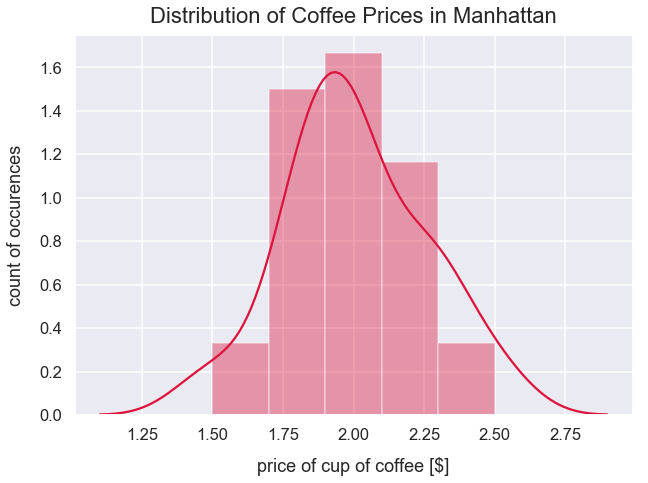

In [158]:
plt.figure(figsize=(10, 7))
sns.distplot(manhattan_coffee_prices, color='crimson')
plt.title("Distribution of Coffee Prices in Manhattan", y=1.015, fontsize=22)
plt.xlabel("price of cup of coffee [$]", labelpad=14)
plt.ylabel("count of occurences", labelpad=14);

The distribution of coffee prices for the sample in San Francisco below looks approximately normal.

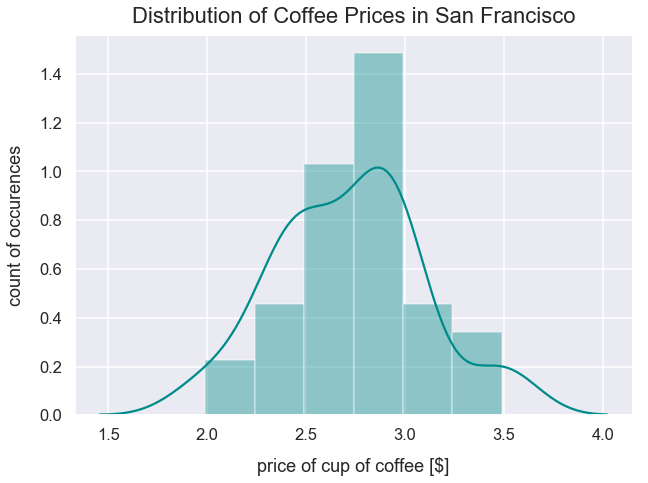

In [159]:
plt.figure(figsize=(10, 7))
sns.distplot(sf_coffee_prices, color='darkcyan')
plt.title("Distribution of Coffee Prices in San Francisco", y=1.015, fontsize=22)
plt.xlabel("price of cup of coffee [$]", labelpad=14)
plt.ylabel("count of occurences", labelpad=14);

#### Check for Outliers in Each City

The boxplot of Manhattan cup of coffee prices belows show no outliers.

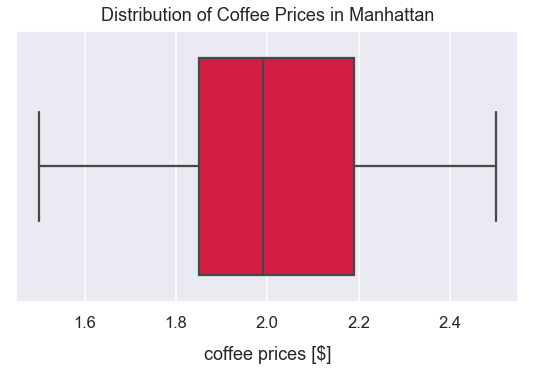

In [160]:
plt.figure(figsize=(9, 5))
sns.boxplot(manhattan_coffee_prices, color='crimson', saturation=0.9)
plt.title("Distribution of Coffee Prices in Manhattan", y=1.015)
plt.xlabel("coffee prices [$]", labelpad=14);

The boxplot of San Francisco cup of coffee prices belows show no outliers too.

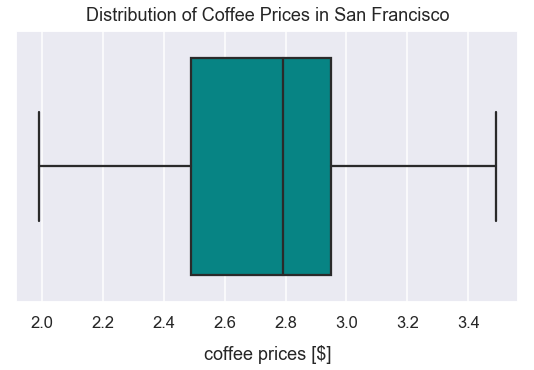

In [161]:
plt.figure(figsize=(9, 5))
sns.boxplot(sf_coffee_prices, color='darkcyan', saturation=0.9)
plt.title("Distribution of Coffee Prices in San Francisco", y=1.015)
plt.xlabel("coffee prices [$]", labelpad=14);

Overall, I think this data fits the requirements to perform an independent samples t-test.

### 5) Calculate t-critical Value

Assign variables for the count of observations in each group.

In [162]:
manhattan_count_observations = len(manhattan_coffee_prices)
sf_count_observations = len(sf_coffee_prices)

Different than other types of t-tests, the calculation for degrees of freedom for an independent samples t-test is:

$$(n_{1}-1)+(n_{2}-1)$$

This can be simplified to:

$$n_{1}+n_{2}-2$$

In [163]:
degrees_of_freedom = sf_count_observations + manhattan_count_observations - 2
degrees_of_freedom

63

This is a two-tailed t-test so each tail probability on the t-distribution is $0.025$. We use that value below.

In [164]:
alpha = 0.05
two_tailed_test_prob_tail = alpha/2
t_critical = round(stats.t.ppf(two_tailed_test_prob_tail, degrees_of_freedom), 3)
t_critical

-1.998

Since this is a two-tailed test, the t-critical value is actually $\pm1.998$

### 6) Calculate the t-statistic

There's a method in the Scipy package for performing indepenent t-tests called <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html'>`ttest_ind()`</a>. We set the following arguments:

- `a` to one sample of values
- `b` to the second sample of values
- `equal_var` to `False` since we assume the samples have unequal population variances
- `nan_policy` to `omit` since the two samples are unequal sizes and SciPy must handle that discrepancy appropriately with equations on the backend

In the method, there is a calculation for the mean of `a` minus `b`. Our returned t-statistic is negative since the mean of `b` (the average price for a cup of coffee in SF) is larger than the mean of `a` (the average price for a cup of coffee in Manhattan).

In [165]:
stats.ttest_ind(a=manhattan_coffee_prices, b=sf_coffee_prices, equal_var=False, nan_policy='omit')

Ttest_indResult(statistic=-9.2256676192423, pvalue=4.387713543565749e-13)

I also can utilize the simple t-statistic math equation: 

$$t=\frac{\bar{x}_{1}-\bar{x}_{2}}{SE}$$

First, I'll calculate the mean of each sample.

In [166]:
mean_manhattan_coffee_price = np.mean(manhattan_coffee_prices)
mean_sf_coffee_price = np.mean(sf_coffee_prices)

I calculate the standard deviation for each sample using the <a href='https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html'>sample standard deviation formula</a>.

In [167]:
std_dev_manhattan_coffee_prices = np.std(manhattan_coffee_prices, ddof=1)
std_dev_sf_coffee_prices = np.std(sf_coffee_prices, ddof=1)

I calculate the standard error. This standard error is the standard deviation for an estimated sampling distribution that resembles the difference in sample means.

This is the formula for standard error among two samples for indpendent t-tests: 

$$SE=\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}$$

The subscript $1$ denotes variables for one group and the subscript $2$ denotes variables for the second group.

- $s$ is the sample standard deviation
- $n$ is the number of observations in a sample

In [168]:
standard_error = np.sqrt((std_dev_manhattan_coffee_prices**2/manhattan_count_observations)+(std_dev_sf_coffee_prices**2/sf_count_observations) )
standard_error

0.07745987359533105

Finally, use the intermediary calculations above to calculate the exact t-statistic value.

In [169]:
t_statistic = (mean_manhattan_coffee_price-mean_sf_coffee_price)/standard_error
t_statistic

-9.2256676192423

This manual version of calculating the t-statistic returned the *same* result as the programmatic way. 

#### Interpretation of Results

The t-statistic value of $-9.23$ is much smaller than the negative t-critical value of $-1.998$. Therefore, there is sufficient evidence to reject the null hypothesis. There is a *significant* difference between a cup of drip coffee prices sold in independent shops between San Francisco and Manhattan at an alpha level of $0.05$. I would not expect to see such a large discrepancy between cups of coffee due to random chance.

The difference in coffee cup prices between Manhattan and SF is $9.23$ times greater than you would expect if the null hypothesis was true. Another way of saying this is that the difference in the two city's coffee prices is $9.23$ times *greater* than it would be by random chance.

The returned p-value is $4.39e-19$ which is equivalent to a probability of $0.000000000000339$ or $0.0000000000339\%$. If I assumed both cities had the same cup of drip coffee in the long-run (the null hypothesis), I would expect a discrepancy from our t-test this big just $0.0000000000339\%$ of times with sampling shops. That's a very very low probability!! With such a small probability, it would be nearly impossible to get a difference in cup of coffee prices so large between cities this big due to random chance.

I would infer that I'd expect to see similar results for the entire population.

#### Effect Size Measures

What proportion of the difference in the mean price of a cup of coffee can be attributed to being in a different city of either SF or Manhattan?

The $r^2$ returned below is $0.575$

In [170]:
r_squared_coffee = round(t_statistic**2 / (t_statistic**2 + degrees_of_freedom), 3)
r_squared_coffee

0.575

There is a *fair amount* of variation between the mean price cup of drip coffee in shops between SF and Manhattan.

### Independant t-test Example: Price of Beverages in SF Greater Than in Manhattan by $\$0.43$

Let's say some website claimed the average price of a single beverage item served at a retail location in San Francisco is $\$0.43$ more than in Manhattan. I can utilize this information to form new hypotheses to perform a t-test. I'm curious if a small cup of drip coffee at independent coffee shops in San Francisco is still *relatitively significantly* more expensive than Manhattan. 

Now, this is a one-tail positive direction independent samples t-test. 

$H_{o}:\mu_{sf}-0.43<=\mu_{manhattan}$

$H_{a}:\mu_{sf}-0.43>\mu_{manhattan}$

#### Calculate t-critical value

This is a one-tailed positive direction t-test with an alpha level of $0.05$, there should be an area under the curve of the t-distribution to the left of a t-critical value of $0.95$.

In [171]:
alpha = 0.05
area_left_under_curve = 1-alpha
t_critical = round(stats.t.ppf(area_left_under_curve, degrees_of_freedom), 3)
t_critical

1.669

#### Calculate t-statistic

I also can utilize the simple t-statistic math equation from earlier: 

$$t=\frac{\bar{x}_{1}-\bar{x}_{2}}{SE}$$

However, I want to incorporate $\$0.43$ in the numerator so the t-statistic calculation will be:

$$t=\frac{\mu_{sf}-\mu_{manhattan}-0.43}{SE}$$

For the t-statistic equation, the numerator should be closer to 0 with this additional value of the difference in means under the null hypothesis.

Previously, the numerator for the two-tailed test was:

In [172]:
original_numerator = mean_manhattan_coffee_price-mean_sf_coffee_price
original_numerator

-0.7146190476190473

The new numerator is now:

In [173]:
updated_numerator = mean_sf_coffee_price-mean_manhattan_coffee_price-0.43
updated_numerator

0.28461904761904727

Calculate the t-statistic using the formula above.

In [174]:
t_statistic_sf_greater = (updated_numerator)/standard_error
t_statistic_sf_greater

3.674406301073578

<a href='https://www.statsmodels.org/stable/index.html'>StatsModels</a> is a great package in python for statistical computations. I can use the `ttest_ind()` <a href='https://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ttest_ind.html'>method</a>. For this method, we set the following arguments:

- `x1` to the list of `manhattan_coffee_prices` 
- `x2` to the list of `sf_coffee_prices`
- `alternative` to `larger` since the alternative hypothesis is to identify if the t-statistic is larger than a positive t-critical value
- `usevar` to `unequal` because the standard deviation of samples is unequal and there are unequal sample sizes. (Read more about <a href='https://en.wikipedia.org/wiki/Welch%27s_t-test'>Welch's variation of the t-test</a> here.)
- `value` to `0.43` since that's the value we want subtracted from the difference in means

In [175]:
results = statsmodelsweightstats.ttest_ind(x1=sf_coffee_prices, x2=manhattan_coffee_prices, alternative='larger', usevar='unequal', value=0.43) 
t_statistic_sf_greater2 = results[0]
p_value = results[1]
degrees_of_freedom = results[2]

In [176]:
t_statistic_sf_greater2

3.6744063010735837

With the formula above and using the `StatsModels` library, we get the same t-statistic result from using the formula above.

#### Interpret Results

The t-critical value is $1.669$ and the t-statistic is $3.67$

Since this is a one-tailed positive direction test and the t-statistic is greater than the t-critical value, there is sufficient evidence to reject the null hypothesis.

I'm curious if a small cup of drip coffee at independent coffee shops in San Francisco is still *relatitively significantly* more expensive than Manhattan. 

There is a *relative significant* difference that the price of a cup of a small drip coffee at independent shops in San Francisco is greater than Manhattan.